In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%cd /content/drive/My\ Drive/Colab\ Notebooks/data 
# change directory
%pwd  # Ben neredeyim komutu
!ls    # İçerisinde ne var 

/content/drive/My Drive/Colab Notebooks/data
states_all.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
original_data = pd.read_csv("states_all.csv")
original_data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,nan,2678885.00,304177.00,1659028.00,715680.00,2653798.00,1481703.00,735036.00,nan,174053.00,8224.00,55460.00,57948.00,58025.00,41167.00,nan,nan,731634.00,208.00,252.00,207.00,nan
1,1992_ALASKA,ALASKA,1992,nan,1049591.00,106780.00,720711.00,222100.00,972488.00,498362.00,350902.00,nan,37451.00,2371.00,10152.00,9748.00,8789.00,6714.00,nan,nan,122487.00,nan,nan,nan,nan
2,1992_ARIZONA,ARIZONA,1992,nan,3258079.00,297888.00,1369815.00,1590376.00,3401580.00,1435908.00,1007732.00,nan,609114.00,2544.00,53497.00,55433.00,49081.00,37410.00,nan,nan,673477.00,215.00,265.00,209.00,nan
3,1992_ARKANSAS,ARKANSAS,1992,nan,1711959.00,178571.00,958785.00,574603.00,1743022.00,964323.00,483488.00,nan,145212.00,808.00,33511.00,34632.00,36011.00,27651.00,nan,nan,441490.00,210.00,256.00,211.00,nan
4,1992_CALIFORNIA,CALIFORNIA,1992,nan,26260025.00,2072470.00,16546514.00,7641041.00,27138832.00,14358922.00,8520926.00,nan,2044688.00,59067.00,431763.00,418418.00,363296.00,270675.00,nan,nan,5254844.00,208.00,261.00,202.00,nan


In [0]:
data=original_data.copy()

In [7]:
data

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,nan,2678885.00,304177.00,1659028.00,715680.00,2653798.00,1481703.00,735036.00,nan,174053.00,8224.00,55460.00,57948.00,58025.00,41167.00,nan,nan,731634.00,208.00,252.00,207.00,nan
1,1992_ALASKA,ALASKA,1992,nan,1049591.00,106780.00,720711.00,222100.00,972488.00,498362.00,350902.00,nan,37451.00,2371.00,10152.00,9748.00,8789.00,6714.00,nan,nan,122487.00,nan,nan,nan,nan
2,1992_ARIZONA,ARIZONA,1992,nan,3258079.00,297888.00,1369815.00,1590376.00,3401580.00,1435908.00,1007732.00,nan,609114.00,2544.00,53497.00,55433.00,49081.00,37410.00,nan,nan,673477.00,215.00,265.00,209.00,nan
3,1992_ARKANSAS,ARKANSAS,1992,nan,1711959.00,178571.00,958785.00,574603.00,1743022.00,964323.00,483488.00,nan,145212.00,808.00,33511.00,34632.00,36011.00,27651.00,nan,nan,441490.00,210.00,256.00,211.00,nan
4,1992_CALIFORNIA,CALIFORNIA,1992,nan,26260025.00,2072470.00,16546514.00,7641041.00,27138832.00,14358922.00,8520926.00,nan,2044688.00,59067.00,431763.00,418418.00,363296.00,270675.00,nan,nan,5254844.00,208.00,261.00,202.00,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,247.00,287.00,224.00,262.00
1711,2019_WASHINGTON,WASHINGTON,2019,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,240.00,286.00,220.00,266.00
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,231.00,272.00,213.00,256.00
1713,2019_WISCONSIN,WISCONSIN,2019,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,242.00,289.00,220.00,267.00


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

In [0]:
data.loc[:,'TOTAL_REVENUE'].fillna(data.loc[:,'TOTAL_REVENUE'].interpolate(),inplace=True) # Revenue içindeki boş verilerin doldurulması

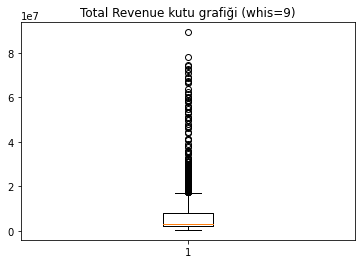

In [10]:
plt.boxplot(data["TOTAL_REVENUE"], whis=1.5) #Revenue Aykırı değerleri
plt.title("Total Revenue kutu grafiği (whis=1.5)")
plt.show()

In [21]:
from scipy.stats.mstats import winsorize # Revenue Veri ayıklama

winsorize_revenue = winsorize(data["TOTAL_REVENUE"], (0, 0.15))

winsorize_revenue

masked_array(data=[2678885., 1049591., 3258079., ..., 2044669., 2044669.,
                   2044669.],
             mask=False,
       fill_value=1e+20)

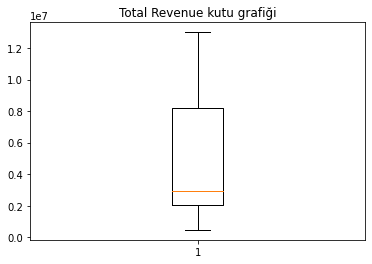

In [22]:
plt.boxplot(winsorize_revenue) # Ayıklanmış Revenue Çizimi
plt.title("Total Revenue kutu grafiği")
plt.show()

In [0]:
data.loc[:,'TOTAL_EXPENDITURE'].fillna(data.loc[:,'TOTAL_EXPENDITURE'].interpolate(),inplace=True) # Önce boş verileri mean ile doldurdum

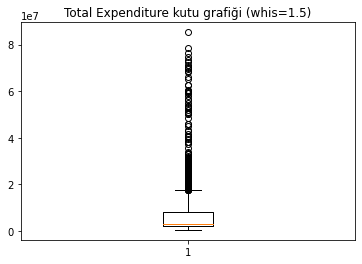

In [24]:
plt.boxplot(data["TOTAL_EXPENDITURE"], whis=1.5) # Aykırı değerlerin gösterimi expenditure için
plt.title("Total Expenditure kutu grafiği (whis=1.5)")
plt.show()

In [25]:
from scipy.stats.mstats import winsorize # Aykırıların ayıklanması

winsorize_expenditure = winsorize(data["TOTAL_EXPENDITURE"], (0, 0.15))

winsorize_expenditure

masked_array(data=[2653798.,  972488., 3401580., ..., 2034229., 2034229.,
                   2034229.],
             mask=False,
       fill_value=1e+20)

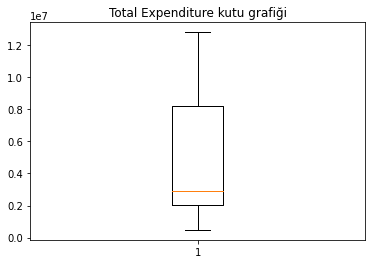

In [26]:
plt.boxplot(winsorize_expenditure) # Ayıklanmışın çizimi
plt.title("Total Expenditure kutu grafiği")
plt.show()

In [27]:
data['Butce_Acigi']=data.loc[:,'TOTAL_EXPENDITURE']-data.loc[:,'TOTAL_REVENUE'] # Bütçe açığı için önce Fark Alma
data['Butce_Acigi']

0      -25087.00
1      -77103.00
2      143501.00
3       31063.00
4      878807.00
          ...   
1710   -10440.00
1711   -10440.00
1712   -10440.00
1713   -10440.00
1714   -10440.00
Name: Butce_Acigi, Length: 1715, dtype: float64

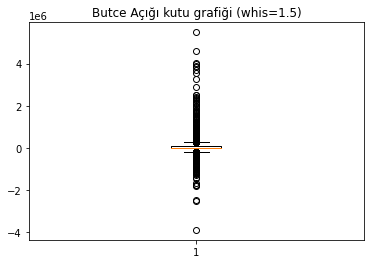

In [30]:
plt.boxplot(data["Butce_Acigi"], whis=1.5)
plt.title("Butce Açığı kutu grafiği (whis=1.5)")
plt.show()

In [37]:
from scipy.stats.mstats import winsorize

winsorize_butceAcigi = winsorize(data["Butce_Acigi"], (0, 0.1))

winsorize_butceAcigi

masked_array(data=[-25087., -77103., 143501., ..., -10440., -10440.,
                   -10440.],
             mask=False,
       fill_value=1e+20)

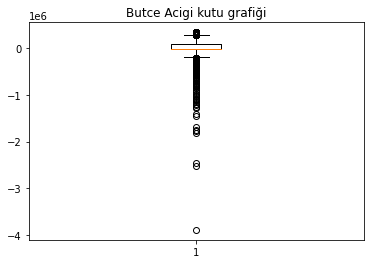

In [38]:
plt.boxplot(winsorize_butceAcigi) # Önce Fark alma sonradan Ayıklama çizimi
plt.title("Butce Acigi kutu grafiği")
plt.show()

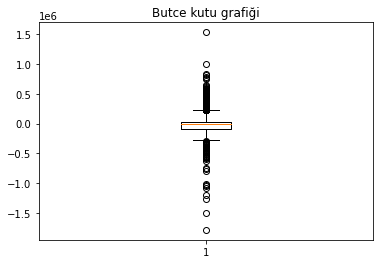

In [39]:
winsorize_butce=winsorize_expenditure-winsorize_revenue #Önce Ayıklama sonra Fark alma çizimi

plt.boxplot(winsorize_butce)
plt.title("Butce kutu grafiği")
plt.show()

Bu ikisi arasındaki fark ilk başta ayıklama yapıp fark aldığımızda negatif değerlerin ve aykırı değerlerin fazlalaştığını ve yaptığım analizde ortalama değerden çok uzaklaşıldığını görmekteyim